# This notebook explores how outliers are detected in a dataset

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load a dataset
data = pd.read_csv('weight-height.csv')

In [3]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
data.describe().round(2)

,Height,Weight
count,10000.00,10000.00
mean,66.37,161.44
std,3.85,32.11
min,54.26,64.70
25%,63.51,135.82
50%,66.32,161.21
75%,69.17,187.17
max,79.00,269.99


The data shows distribution of height and weight.<br>
Height is in <i>inches</i> and weight is in <i>pounds</i>.

<Axes: xlabel='Height', ylabel='Count'>

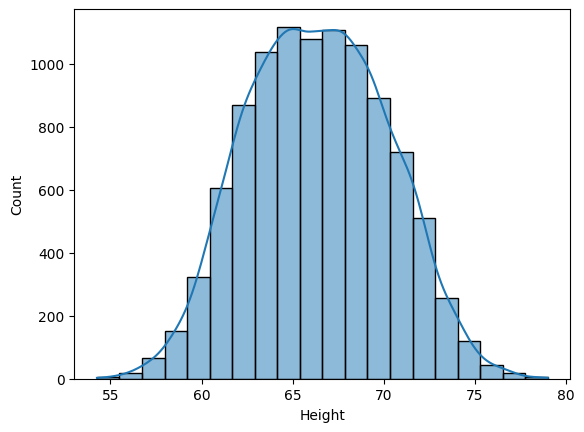

In [5]:
# plot a histogram plot for height and weight
sns.histplot(data,x='Height',kde=True,bins=20)

<Axes: xlabel='Weight', ylabel='Count'>

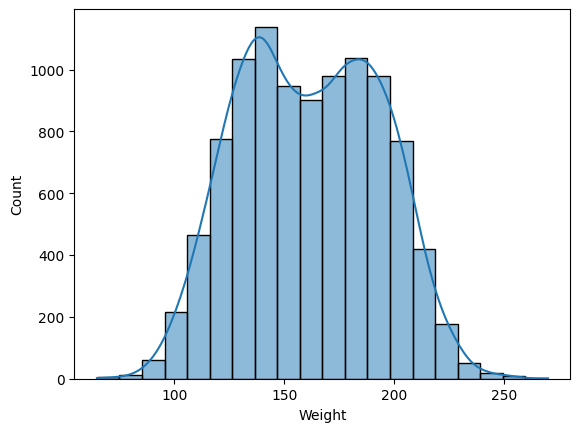

In [6]:
sns.histplot(data,x='Weight',kde=True,bins=20)

We see that both height and weight are distributed normally, i.e., they follow normal distribution. So we can apply specific methods based on normal distribution to detect outliers.

There are several methods of outlier detection. Three of them are illustrated here:
1. n-Standard Deviation
2. z-Score
3. Inter Quartile Range

## n-Standard Deviation

In this method, we consider all the points outside n-standard deviations as outliers.<br>
For instance:<br>
If we consider a 2 standard deviation method, any method lying outside that 2 standard deviations will be considered outlier. The parameter 'n' is chosen based on data and its distribution.

In [21]:
# let us detect outliers in height column using 3-Standard Deviation method

# compute standard deviation
std_dev = data['Height'].std()

# group data according to conditions - 
# if (datapoint > mean+3*std_dev) or (datapoint < mean-3*std_dev) --> point is an outlier

# compute limits

upper_limit = data['Height'].mean() + 3*std_dev
lower_limit = data['Height'].mean() - 3*std_dev

# extract outliers
outliers_3std = data[(data['Height'] > upper_limit) | (data['Height'] < lower_limit)]

In [22]:
# print the outliers dataframe
outliers_3std

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


We see that we obtain 7 outliers using the 3-Standard Deviation method.

In [23]:
# if we use 2 standard deviation method
outliers_2std = data[(data['Height'] > data['Height'].mean() + 2*std_dev) | 
                     (data['Height'] < data['Height'].mean() - 2*std_dev)]

In [24]:
outliers_2std

,Gender,Height,Weight
2,Male,74.110105,212.740856
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
...,...,...,...
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551
9913,Female,58.351003,110.122151


We obtain 348 outliers using the <b>2 Standard Deviation method</b>.

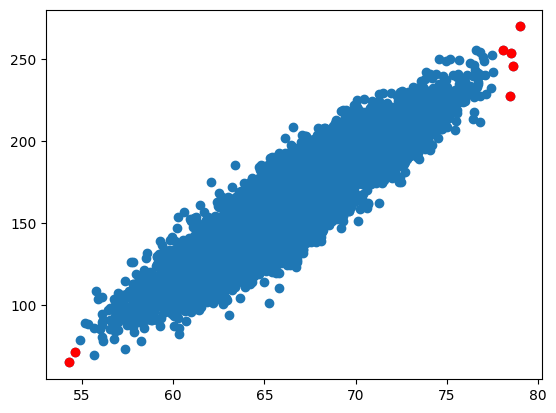

In [ ]:
# plot outliers
plt.scatter(data['Height'],data['Weight'])
plt.scatter(outliers_3std['Height'],outliers_3std['Weight'],color='r')
plt.xlabel('W')